# *Name:     Rajan Shahurao Bangar*

### Department:  MTech Post Graduate, IME Department, IIT Kanpur
### Project Name:   Forecasting Future SBI Stock Price with Time Series Analysis\SBI Stock Forecasting using Time Series Analysis Models


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

In [3]:
df = pd.read_csv("./SBIN Stock Price data.csv")
df

,Date,Open,High,Low,Close,Volume
0,03-01-2017,239.601049,241.957775,236.753338,240.484817,15963085
1,04-01-2017,241.368600,241.957774,237.833497,238.520874,11225978
2,05-01-2017,240.583016,241.466784,239.306450,240.926712,11970913
3,06-01-2017,241.564985,244.510899,241.073999,241.466782,12354302
4,09-01-2017,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,08-06-2021,432.250000,432.500000,424.000000,427.200012,31113823
1091,09-06-2021,427.500000,432.299988,418.200012,421.450012,27784834
1092,10-06-2021,424.899994,433.299988,422.399994,432.250000,27397712
1093,11-06-2021,434.850006,435.500000,425.250000,429.600006,26831924


In [4]:
df['Date'] = pd.to_datetime(df.Date,dayfirst=True)

In [5]:
df

,Date,Open,High,Low,Close,Volume
0,2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
1,2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2,2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
3,2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
4,2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...,...
1090,2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
1091,2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
1092,2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712
1093,2021-06-11,434.850006,435.500000,425.250000,429.600006,26831924


In [6]:
data = df.drop(['Date'], axis=1)
data.index = df.Date

In [7]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-06-08,432.250000,432.500000,424.000000,427.200012,31113823
2021-06-09,427.500000,432.299988,418.200012,421.450012,27784834
2021-06-10,424.899994,433.299988,422.399994,432.250000,27397712


In [8]:
train_df = data.iloc[:int(df.shape[0]*0.9595), :]
valid_df = data.iloc[int(df.shape[0]*0.9595):, :]

In [9]:
train_df.shape, valid_df.shape

((1050, 5), (45, 5))

In [10]:
df.shape

(1095, 6)

### Auto Regressive (AR) model

In [11]:
train_df

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,239.601049,241.957775,236.753338,240.484817,15963085
2017-01-04,241.368600,241.957774,237.833497,238.520874,11225978
2017-01-05,240.583016,241.466784,239.306450,240.926712,11970913
2017-01-06,241.564985,244.510899,241.073999,241.466782,12354302
2017-01-09,241.957764,243.872620,241.564981,242.596054,8329253
...,...,...,...,...,...
2021-03-31,357.003939,364.484889,354.675461,360.967346,38651025
2021-04-01,364.336282,368.497842,359.778357,367.259277,31883453
2021-04-05,364.138102,365.822562,345.856870,350.315704,51743981


In [12]:
len(valid_df), len(train_df)

(45, 1050)

In [13]:
len(valid_df), len(train_df)

(45, 1050)

In [14]:
from statsmodels.tsa.ar_model import AutoReg

# fit model
model = AutoReg(train_df['Close'], lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    354.767843
1051    354.269561
1052    353.775082
1053    353.284379
1054    352.797421
1055    352.314180
1056    351.834628
1057    351.358738
1058    350.886479
1059    350.417826
1060    349.952751
1061    349.491226
1062    349.033224
1063    348.578718
1064    348.127682
1065    347.680089
1066    347.235912
1067    346.795127
1068    346.357706
1069    345.923624
1070    345.492856
1071    345.065376
1072    344.641160
1073    344.220182
1074    343.802418
1075    343.387842
1076    342.976432
1077    342.568162
1078    342.163008
1079    341.760948
1080    341.361957
1081    340.966011
1082    340.573088
1083    340.183165
1084    339.796218
1085    339.412225
1086    339.031163
1087    338.653010
1088    338.277744
1089    337.905342
1090    337.535783
1091    337.169046
1092    336.805108
1093    336.443948
1094    336.085545
dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [15]:
yhat.index = valid_df.index

In [16]:
mse(yhat, valid_df['Close'])

2950.2350574649126

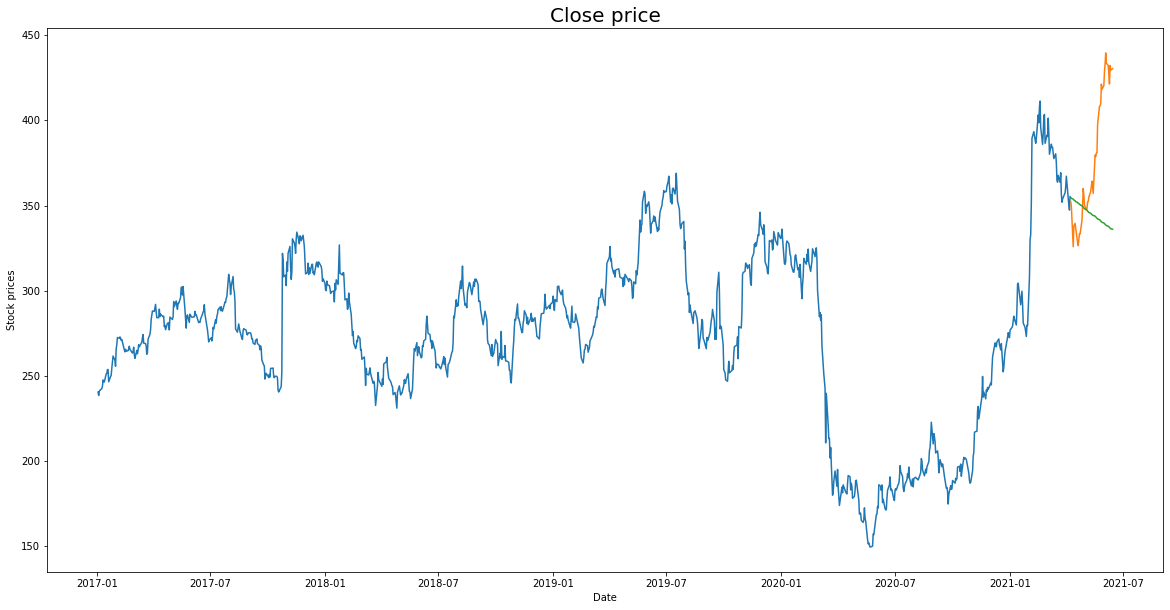

In [17]:
plt.figure(figsize=(20,10))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel("Date")
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
#plt.legend()
plt.show()

### Moving Average (MA)

In [18]:
# MA example
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0,0,1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

# model = AutoReg(train_df['Close'], lags=1)
# model_fit = model.fit()
# # make prediction
# yhat = model_fit.predict(982, 1227)
# print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    307.215393
1051    275.253896
1052    275.253896
1053    275.253896
1054    275.253896
1055    275.253896
1056    275.253896
1057    275.253896
1058    275.253896
1059    275.253896
1060    275.253896
1061    275.253896
1062    275.253896
1063    275.253896
1064    275.253896
1065    275.253896
1066    275.253896
1067    275.253896
1068    275.253896
1069    275.253896
1070    275.253896
1071    275.253896
1072    275.253896
1073    275.253896
1074    275.253896
1075    275.253896
1076    275.253896
1077    275.253896
1078    275.253896
1079    275.253896
1080    275.253896
1081    275.253896
1082    275.253896
1083    275.253896
1084    275.253896
1085    275.253896
1086    275.253896
1087    275.253896
1088    275.253896
1089    275.253896
1090    275.253896
1091    275.253896
1092    275.253896
1093    275.253896
1094    275.253896
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [19]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

11970.6150385467

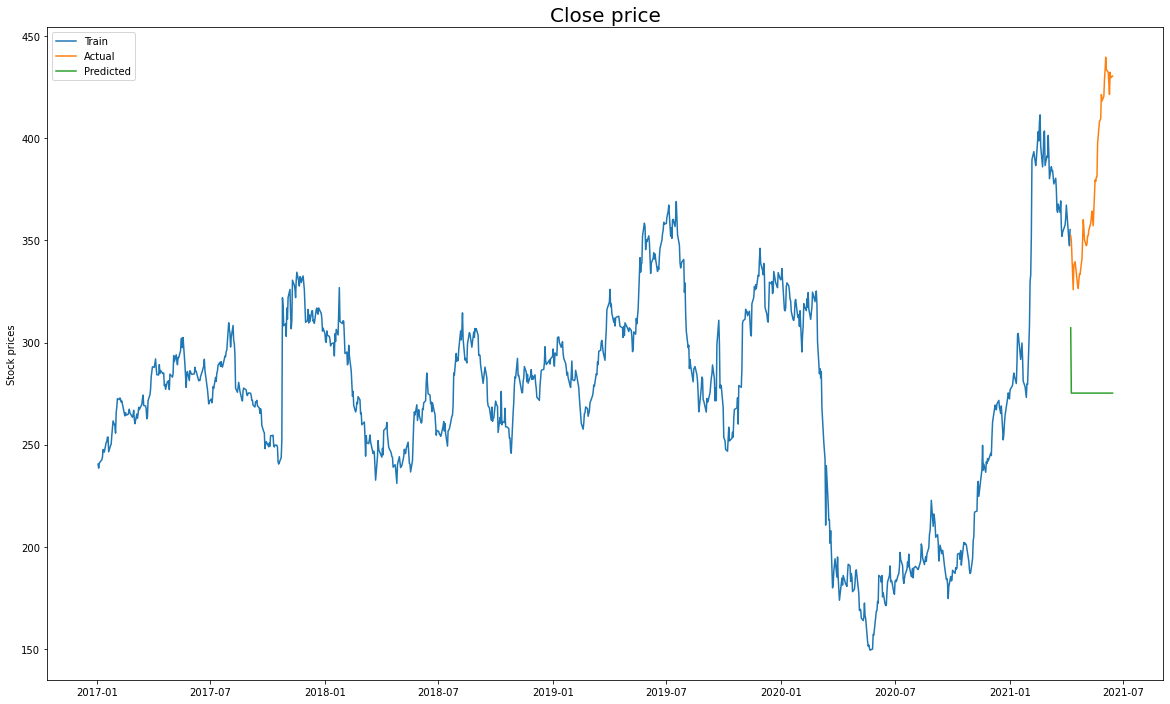

In [20]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

## Autoregressive Integrated Moving Average (ARIMA) will be used from after v_0.12

#### Autoregressive Moving Average (ARMA) has been Depricated!

Note: statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

Note: statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

### ARIMA(0, 1, 2)

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1932.738488559527

### ARIMA(0, 2, 1)

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 2, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.383160
1051    355.496361
1052    355.609562
1053    355.722763
1054    355.835965
1055    355.949166
1056    356.062367
1057    356.175568
1058    356.288770
1059    356.401971
1060    356.515172
1061    356.628373
1062    356.741575
1063    356.854776
1064    356.967977
1065    357.081178
1066    357.194380
1067    357.307581
1068    357.420782
1069    357.533983
1070    357.647185
1071    357.760386
1072    357.873587
1073    357.986788
1074    358.099990
1075    358.213191
1076    358.326392
1077    358.439593
1078    358.552795
1079    358.665996
1080    358.779197
1081    358.892398
1082    359.005600
1083    359.118801
1084    359.232002
1085    359.345203
1086    359.458405
1087    359.571606
1088    359.684807
1089    359.798008
1090    359.911210
1091    360.024411
1092    360.137612
1093    360.250813
1094    360.364015
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [23]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1730.2584914823756

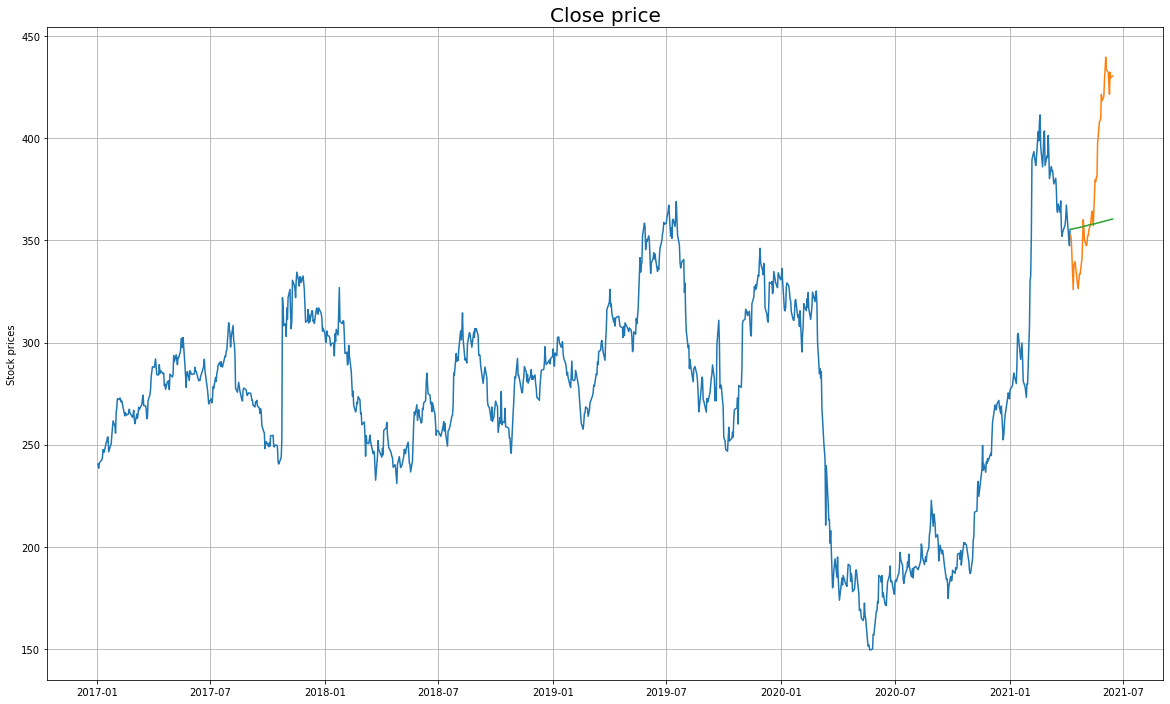

In [24]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARIMA(0, 2, 2)

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 2, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1726.537625614123

### ARIMA(3, 1, 0)

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1926.982318945716

### ARIMA(0, 3, 2)

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\So

856.2279687279195

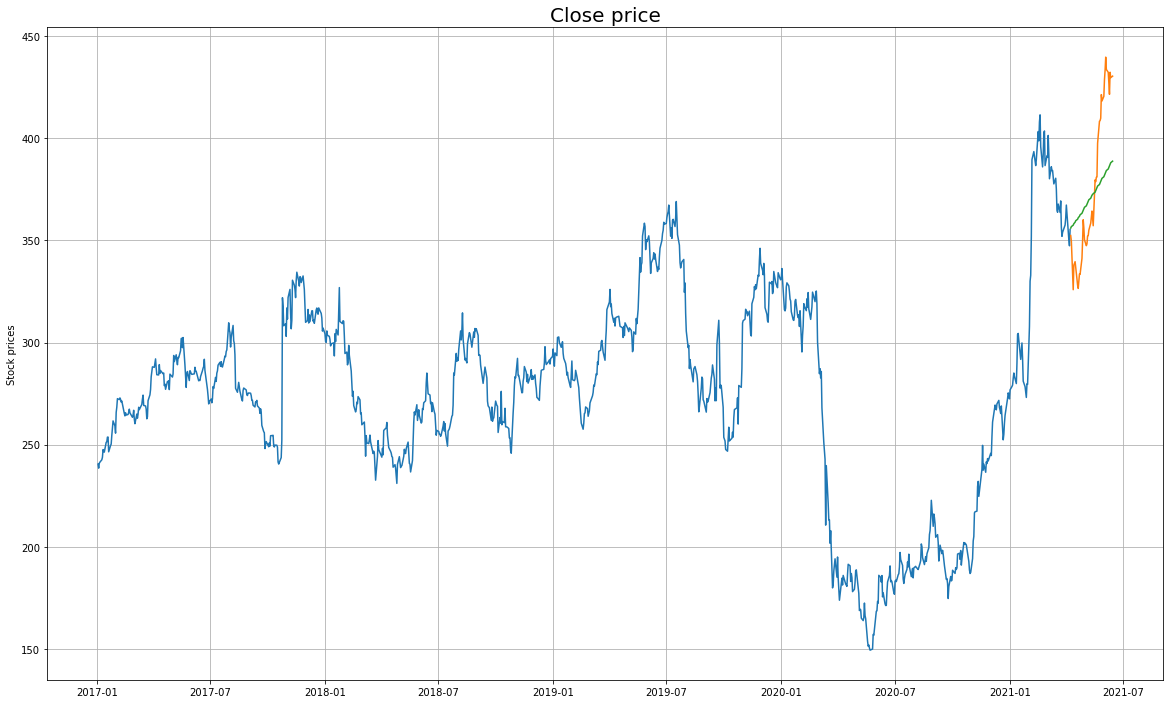

In [28]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.grid()

### ARIMA(0, 3, 3)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\So

932.3197290754266

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1,1,0))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1939.5774335722422

### ARIMA(1,1,1)

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(1, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.119236
1051    354.984629
1052    354.864416
1053    354.757057
1054    354.661178
1055    354.575551
1056    354.499080
1057    354.430786
1058    354.369794
1059    354.315324
1060    354.266678
1061    354.223234
1062    354.184436
1063    354.149786
1064    354.118841
1065    354.091205
1066    354.066524
1067    354.044482
1068    354.024797
1069    354.007216
1070    353.991516
1071    353.977495
1072    353.964972
1073    353.953789
1074    353.943802
1075    353.934882
1076    353.926916
1077    353.919802
1078    353.913449
1079    353.907775
1080    353.902708
1081    353.898182
1082    353.894141
1083    353.890531
1084    353.887308
1085    353.884429
1086    353.881858
1087    353.879562
1088    353.877512
1089    353.875680
1090    353.874045
1091    353.872584
1092    353.871280
1093    353.870115
1094    353.869075
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [32]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

2017.7687682405292

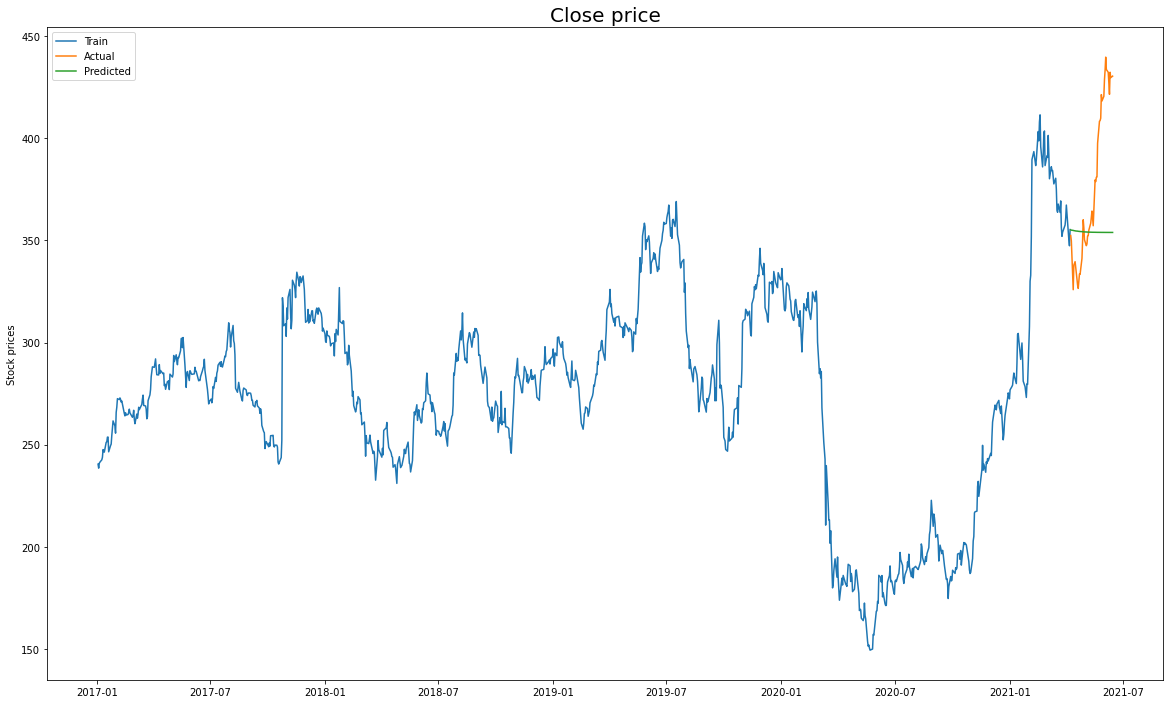

In [33]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

In [34]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(0, 3, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\So

932.3197290754266

### ARIMA(2,1,1)

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.401931
1051    355.606054
1052    355.580857
1053    355.590163
1054    355.588137
1055    355.588686
1056    355.588551
1057    355.588586
1058    355.588577
1059    355.588579
1060    355.588579
1061    355.588579
1062    355.588579
1063    355.588579
1064    355.588579
1065    355.588579
1066    355.588579
1067    355.588579
1068    355.588579
1069    355.588579
1070    355.588579
1071    355.588579
1072    355.588579
1073    355.588579
1074    355.588579
1075    355.588579
1076    355.588579
1077    355.588579
1078    355.588579
1079    355.588579
1080    355.588579
1081    355.588579
1082    355.588579
1083    355.588579
1084    355.588579
1085    355.588579
1086    355.588579
1087    355.588579
1088    355.588579
1089    355.588579
1090    355.588579
1091    355.588579
1092    355.588579
1093    355.588579
1094    355.588579
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [36]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1931.3595786506482

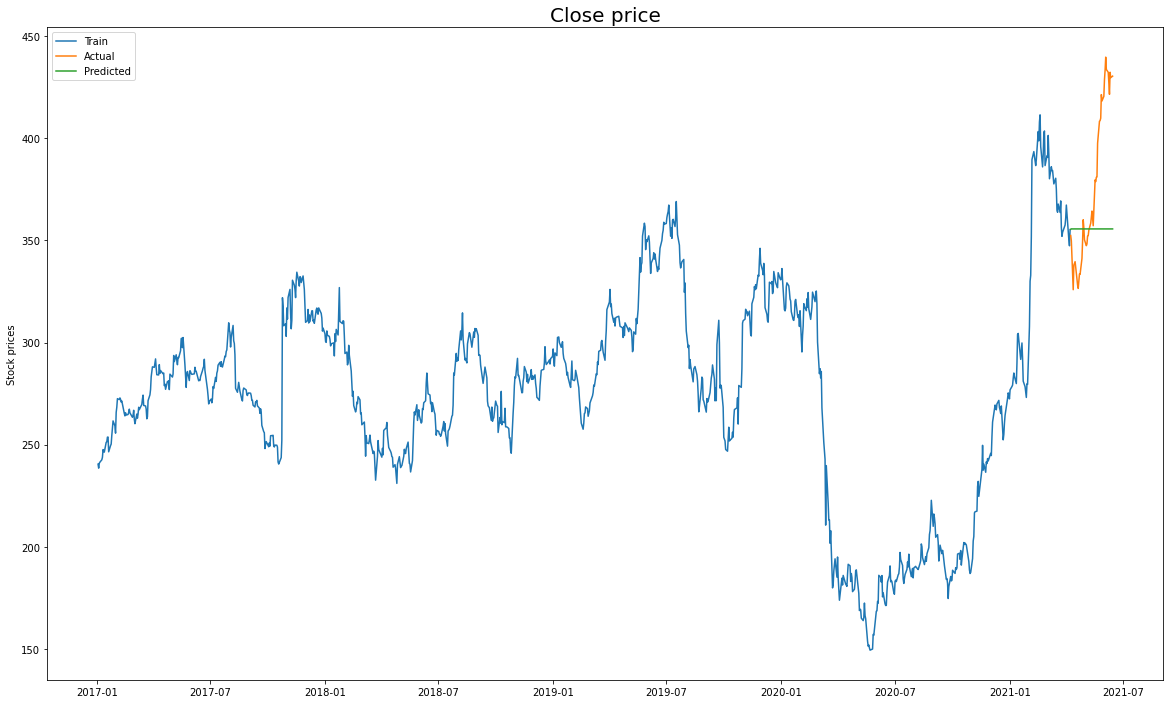

In [37]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### ARIMA(2,1,2)

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(2, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

1943.607060499144

### ARIMA(3,1,1)

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1926.9889765382666

### ARIMA(3,1,2)

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parame

1917.7847882817773

### ARIMA(3,1,3)

In [41]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(train_df['Close'], order=(3, 1, 3))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094, typ='levels')
#print(yhat)

yhat.index = valid_df.index
mse(yhat, valid_df['Close'])

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Sonu\anacon

1800.9860048420944

In [42]:
from pmdarima.arima import auto_arima

model_auto = auto_arima(train_df['Close'],exog=train_df['Open'],
                        m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 5)   Log Likelihood               -3449.149
Date:                           Sun, 21 Aug 2022   AIC                           6902.299
Time:                                   15:36:08   BIC                           6912.210
Sample:                                        0   HQIC                          6906.057
                                          - 1050                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5        0.1141      0.029      3.925      0.000       0.057       0.171
sigma2        42.0194      0.621     67.681      0.000      40.803      43.236
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):             10719.15
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.50   Skew:                             1.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    355.544496
1051    355.718717
1052    358.052743
1053    357.655703
1054    357.736779
1055    357.454526
1056    357.453623
1057    358.029416
1058    358.308803
1059    355.866768
1060    354.666209
1061    355.517687
1062    355.468387
1063    356.067509
1064    358.110164
1065    358.886767
1066    359.421753
1067    358.939177
1068    358.613852
1069    358.927091
1070    358.649943
1071    357.574487
1072    356.545540
1073    356.737952
1074    356.662194
1075    357.304509
1076    359.322678
1077    360.211790
1078    360.791416
1079    360.291808
1080    359.937550
1081    360.227436
1082    359.899172
1083    358.952826
1084    357.940766
1085    358.072029
1086    357.994362
1087    358.641216
1088    360.657503
1089    361.557522
1090    362.141637
1091    361.640688
1092    361.283934
1093    361.571817
1094    361.238916
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [44]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1716.6564527674216

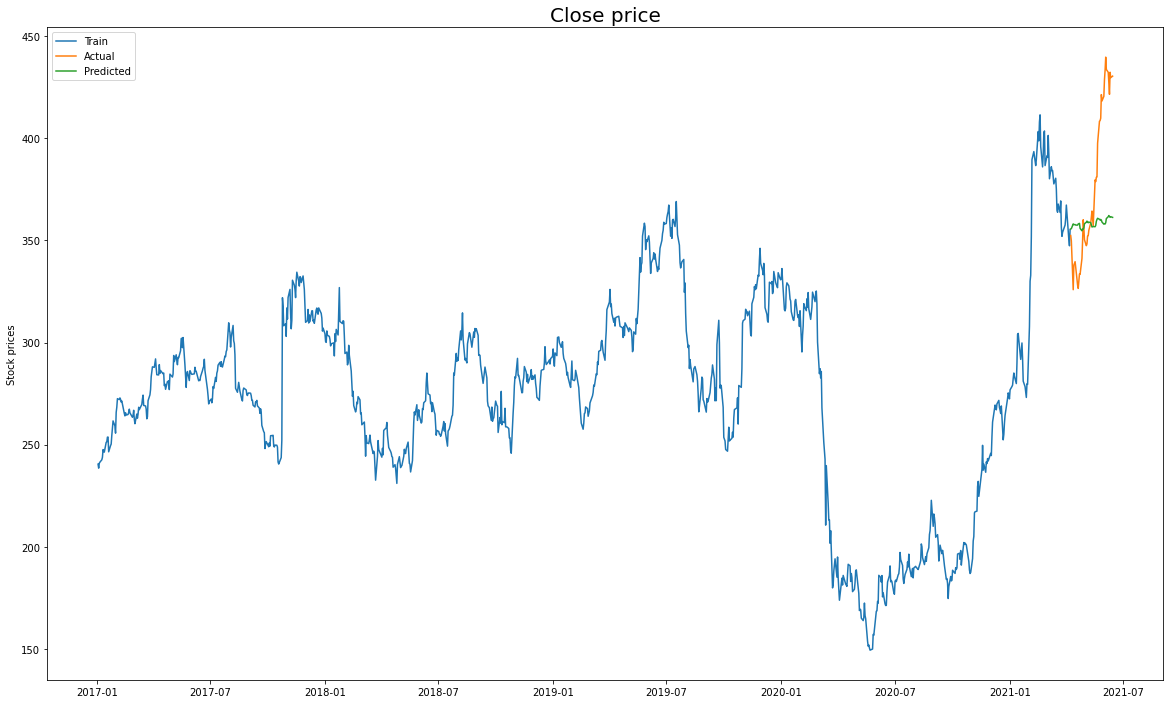

In [45]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# fit model
model = SARIMAX(train_df['Close'], exog=train_df['Open'], order=(1, 1, 1), seasonal_order=(1,1,1,4))
model_fit = model.fit(disp=False)
# make prediction

yhat = model_fit.predict(1050, 1094, exog = valid_df['Open'])
print(yhat)

c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1050    356.494560
1051    349.335266
1052    339.018808
1053    328.915312
1054    338.119560
1055    338.374316
1056    322.539135
1057    331.806340
1058    322.315204
1059    327.234650
1060    334.419745
1061    340.540682
1062    352.750980
1063    359.977729
1064    348.360920
1065    346.038090
1066    350.786582
1067    351.631497
1068    352.827430
1069    353.793726
1070    356.185836
1071    351.974384
1072    357.539413
1073    366.065726
1074    360.014210
1075    384.520998
1076    376.389645
1077    382.755946
1078    385.148082
1079    411.029422
1080    408.887167
1081    409.067998
1082    408.416489
1083    424.283278
1084    414.679161
1085    421.094544
1086    425.204862
1087    434.625625
1088    434.844270
1089    433.923345
1090    430.545984
1091    425.211457
1092    422.358349
1093    433.674872
1094    425.343082
Name: predicted_mean, dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [47]:
yhat.index = valid_df.index



print("MSE for order=(1, 1, 1), seasonal_order=(1,1,1,4) is:    " + str(mse(yhat, valid_df['Close'])))

MSE for order=(1, 1, 1), seasonal_order=(1,1,1,4) is:    46.32941412885504


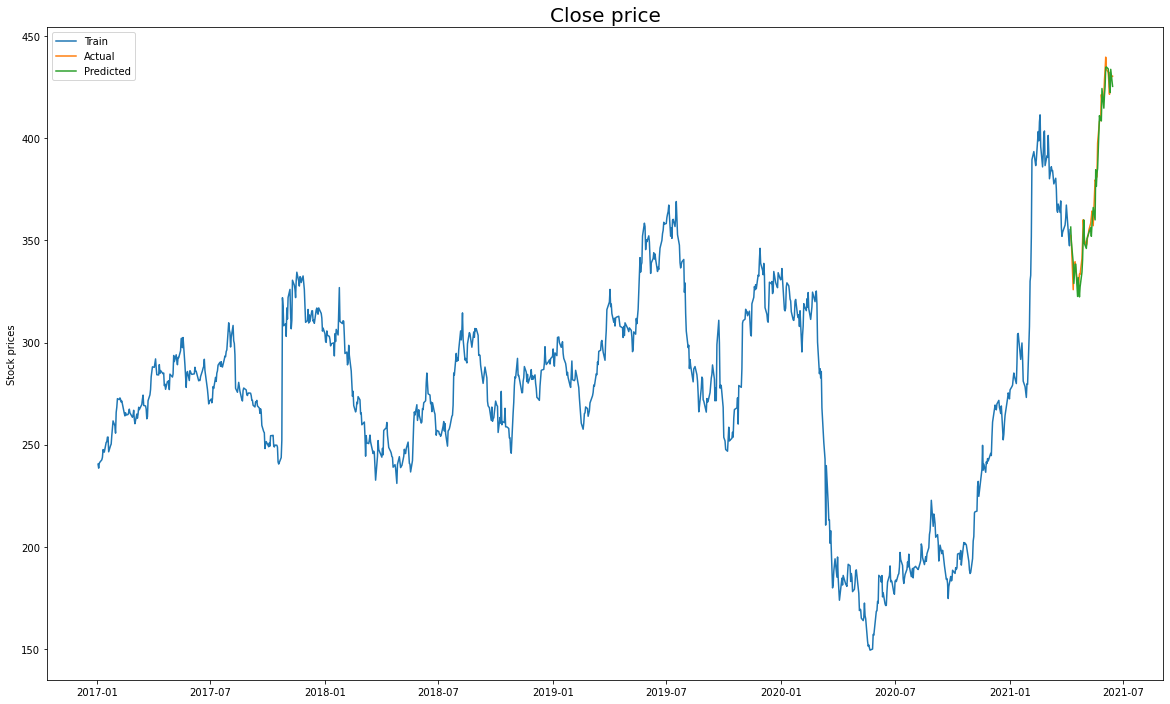

In [48]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()

### Simple Exponential Smoothing (SES)

In [49]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(train_df['Close'])
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(1050, 1094)
print(yhat)

1050    355.269958
1051    355.269958
1052    355.269958
1053    355.269958
1054    355.269958
1055    355.269958
1056    355.269958
1057    355.269958
1058    355.269958
1059    355.269958
1060    355.269958
1061    355.269958
1062    355.269958
1063    355.269958
1064    355.269958
1065    355.269958
1066    355.269958
1067    355.269958
1068    355.269958
1069    355.269958
1070    355.269958
1071    355.269958
1072    355.269958
1073    355.269958
1074    355.269958
1075    355.269958
1076    355.269958
1077    355.269958
1078    355.269958
1079    355.269958
1080    355.269958
1081    355.269958
1082    355.269958
1083    355.269958
1084    355.269958
1085    355.269958
1086    355.269958
1087    355.269958
1088    355.269958
1089    355.269958
1090    355.269958
1091    355.269958
1092    355.269958
1093    355.269958
1094    355.269958
dtype: float64


c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Sonu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [50]:
yhat.index = valid_df.index

mse(yhat, valid_df['Close'])

1946.057125175247

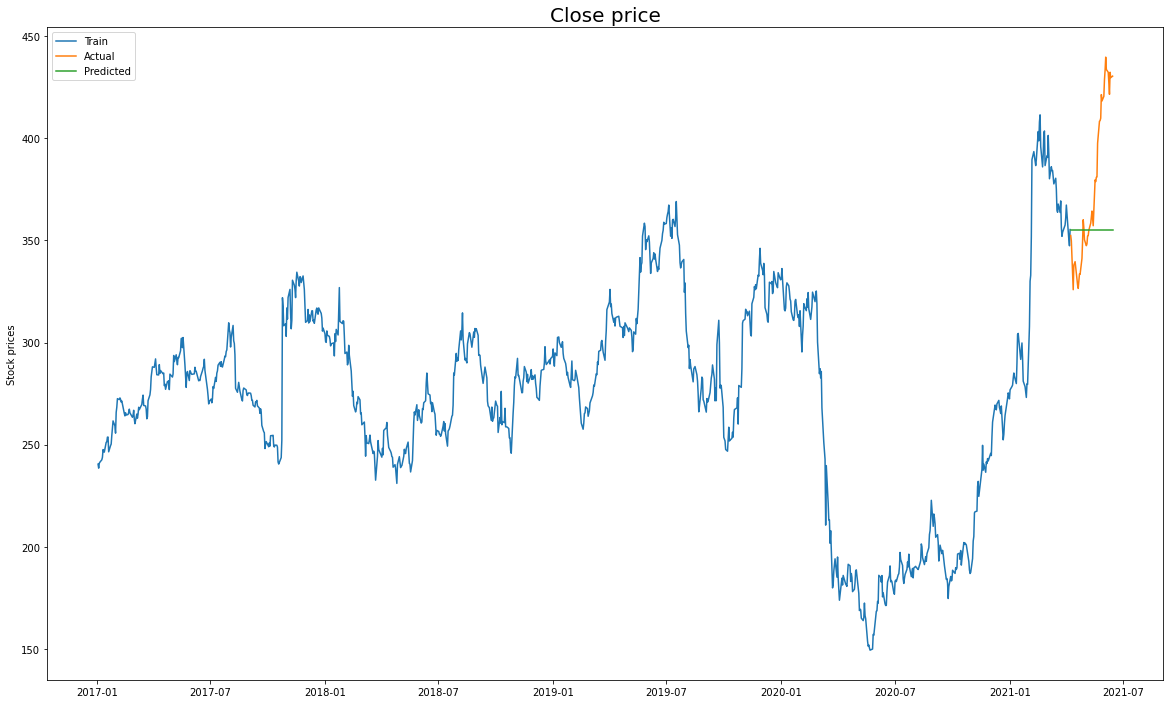

In [51]:
plt.figure(figsize=(20,12))
plt.plot(train_df['Close'], label='Train')
plt.plot(valid_df['Close'], label='Actual')
plt.plot(yhat, label='Predicted')
plt.ylabel("Stock prices")
plt.title('Close price', fontsize = 20)
plt.legend()
plt.show()